In [1]:
# Load Modules
import plot_functions as plot
import os
if os.path.basename(os.getcwd()) == "illustration":
    os.chdir("..")
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
import datajoint as dj
import datetime
import spikeinterface as si
from spikeinterface import widgets, exporters, postprocessing, qualitymetrics, sorters
from workflow.pipeline import *
from workflow.utils.paths import (
    get_ephys_root_data_dir,
    get_raw_root_data_dir,
    get_processed_root_data_dir,
)
from element_interface.utils import dict_to_uuid, find_full_path, find_root_directory

import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import itertools
from workflow.utils.ingestion_utils import El2ROW

[2024-07-10 12:04:29,211][INFO]: Connecting judewerth@db.datajoint.com:3306
[2024-07-10 12:04:29,952][INFO]: Connected judewerth@db.datajoint.com:3306


In [2]:
# Create Global Dictionaries
Batches = ["Batch 1" , "Batch 2" , "Batch 3"]
Drugs = ["Control" , "4-AP" , "No Drug" , "Bicuculline" , "Tetrodotoxin"]
Organoids = {}
Organoids["Batch 1"] = ["O09" , "O10" , "O11" , "O12"]
Organoids["Batch 2"] = ["O13" , "O14" , "O15" , "O16"]
Organoids["Batch 3"] = ["O17" , "O18" , "O19" , "O20"]

used_electrodes = {
                "O09":32 , "O10":16 , "O11":20 , "O12":14 , 
                "O13":25 , "O14":13 , "O15":11 , "O16":11 ,
                "O17":22 , "O18":19 , "O19":20 , "O20":17
                }

paramset = 1

In [3]:
# Insert Experiment (Only do once)
# parent_folder = {"Batch 1":"O09-12_raw",
#                  "Batch 2":"O13-16_raw",
#                  "Batch 3":"O17-20_raw"}

# for batch in Batches:
#     for organoid in Organoids[batch]:

#         # Get experiment start time
#         start_time = min((ephys.EphysRawFile() & {"parent_folder":parent_folder[batch]}).fetch("file_time"))
#         start_time = start_time.replace(second=0)

#         # Get experiment end time
#         end_time = (culture.Experiment() & {"organoid_id":organoid , "drug_name":"4-AP"}).fetch1("experiment_start_time")
#         end_time -= datetime.timedelta(minutes=10)

#         experiment_info = dict(
#         organoid_id = organoid,
#         experiment_start_time = start_time,
#         experiment_end_time = end_time,     
#         drug_name = "Control",
#         drug_concentration = "nan",
#         experiment_plan = "ephys"
#         )

#         culture.Experiment.insert1(experiment_info ,  ignore_extra_fields=True , skip_duplicates=True)

In [3]:
# Create Global Key

global_key = []
for batch in Batches:
    for drug in Drugs:
        for organoid in Organoids[batch]:
            
            # get experiment times
            experiment_start_time , experiment_end_time = (culture.Experiment() & {"organoid_id":organoid , "drug_name":drug}).fetch1("experiment_start_time" , "experiment_end_time")
            
            # get inital session
            start_time1 = experiment_start_time + datetime.timedelta(minutes=5) # 5 minute buffer
            end_time1 = start_time1 + datetime.timedelta(minutes=15)

            # get final session
            end_time2 = experiment_end_time - datetime.timedelta(minutes=5) # 5 minute buffer
            if drug == "No Drug": # Account for time it took to insert drug (10 minutes should be conservative)
                end_time1 -= datetime.timedelta(minutes=10)
            start_time2 = end_time2 - datetime.timedelta(minutes=15)

            key = [
                {"organoid_id":organoid , "experiment_start_time":experiment_start_time , "start_time":start_time1 , "end_time":end_time1},
                {"organoid_id":organoid , "experiment_start_time":experiment_start_time , "start_time":start_time2 , "end_time":end_time2}
            ]
            
            global_key.append(key)

In [5]:
# Check for lfp sessions
# lfp_key_list = []
# for key in global_key:
#     for experiment_info in key:

#         session = ephys.EphysSession() & experiment_info
#         session_type = session.fetch("session_type")
        
#         if len(session_type) == 1:
#             if session_type[0] == 'lfp':
                
#                 lfp_key_list.append(session.fetch1("KEY"))
# lfp_key_list              

[]

In [7]:
# Create Tasks (Only need to do once)

# for key in global_key:
#     for experiment_info in key:

#         print(f"Processing {experiment_info}")

#         used_elec = El2ROW[:used_electrodes[experiment_info["organoid_id"]]]

#         _ = plot.session.spike_sorting_session(
#             organoid_id = experiment_info["organoid_id"],
#             experiment_start_time = experiment_info["experiment_start_time"].strftime("%Y-%m-%d %H:%M:%S"),
#             start_time = experiment_info["start_time"].strftime("%Y-%m-%d %H:%M:%S"),
#             end_time = experiment_info["end_time"].strftime("%Y-%m-%d %H:%M:%S"),
#             used_electrodes = used_elec,
#             paramset = paramset
#         )  
        

Processing {'organoid_id': 'O09', 'experiment_start_time': datetime.datetime(2023, 5, 3, 17, 33), 'start_time': datetime.datetime(2023, 5, 3, 17, 38), 'end_time': datetime.datetime(2023, 5, 3, 17, 53)}
Processing {'organoid_id': 'O09', 'experiment_start_time': datetime.datetime(2023, 5, 3, 17, 33), 'start_time': datetime.datetime(2023, 5, 18, 11, 55), 'end_time': datetime.datetime(2023, 5, 18, 12, 10)}
Processing {'organoid_id': 'O10', 'experiment_start_time': datetime.datetime(2023, 5, 3, 17, 33), 'start_time': datetime.datetime(2023, 5, 3, 17, 38), 'end_time': datetime.datetime(2023, 5, 3, 17, 53)}
Processing {'organoid_id': 'O10', 'experiment_start_time': datetime.datetime(2023, 5, 3, 17, 33), 'start_time': datetime.datetime(2023, 5, 18, 11, 55), 'end_time': datetime.datetime(2023, 5, 18, 12, 10)}
Processing {'organoid_id': 'O11', 'experiment_start_time': datetime.datetime(2023, 5, 3, 17, 33), 'start_time': datetime.datetime(2023, 5, 3, 17, 38), 'end_time': datetime.datetime(2023, 5

In [3]:
# While spike sorting tasks are being sorted
organoid = "O16"
drug = "No Drug"

key = {
    "organoid_id":organoid,
    "experiment_start_time":(culture.Experiment() & {"organoid_id":organoid , "drug_name":drug}).fetch1("experiment_start_time")
}

Tasks = ephys.ClusteringTask() & key & "paramset_idx = '1' AND NOT clustering_output_dir = ''"

In [6]:
ephys.EphysSessionProbe() & f"used_electrodes = '{list([])}'"

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,probe unique identifier for this model of probe (e.g. serial number),port_id,"used_electrodes list of electrode IDs used in this session (if null, all electrodes are used)"


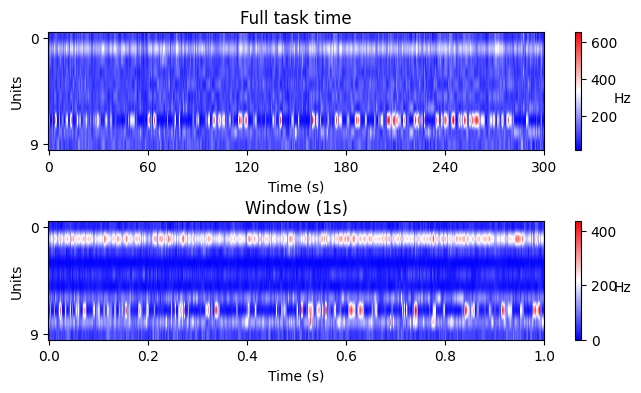

In [65]:
N = 500 # number of time tiles
window_size = 1 # time window (number of seconds) (None = all time period)

# get data
global_query = ephys.CuratedClustering.Unit()
Values = ["spike_times"]

data = plot.data.get_data(Tasks=Tasks , global_query=global_query , Values=Values)

# convert data
new_data = {}
new_data_window = {}

for key , value in data.items():

    if value == "no data":
        new_data[key] = "no data"

    else:
        spike_times = value["spike_times"]

        unit_list = []
        unit_window_list = []
        for unit_spikes in spike_times:
            
            # window
            rand_start = np.random.randint(0 , np.max(unit_spikes)-window_size)
            unit_spikes_window = unit_spikes[unit_spikes > rand_start]
            unit_spikes_window = unit_spikes[unit_spikes < rand_start+window_size]

            unit_spike_window_hist , _ = np.histogram(unit_spikes_window , bins=N)
            unit_window_list.append(unit_spike_window_hist)

            # total
            unit_spike_hist , _ = np.histogram(unit_spikes , bins=N)
            unit_list.append(unit_spike_hist)

        unit_array = np.array(unit_list)
        unit_window_array = np.array(unit_window_list)

        new_data[key] = unit_array
        new_data_window[key] = unit_window_array

# group data
spike_data = plot.data.group_data(new_data , organoid=True)
spike_data_window = plot.data.group_data(new_data_window , organoid=True)

labels = plot.format.get_labels(spike_data)

# plot data
nrows = 2
ncols = 1

figure_data = np.empty((nrows,ncols) , dtype=object)
figure_key = np.empty((nrows,ncols) , dtype=object)

for key in labels:

    figure_data[0,0] = {"image_total":{"image_data":spike_data[key]}}
    figure_data[1,0] = {"image_window":{"image_data":spike_data_window[key]}}

    figure_key[0,0] = "image_total"
    figure_key[1,0] = "image_window"

fig , ax , plot_ax = plot.plot.get_figure(figure_key=figure_key , figure_data=figure_data)

for idx, p in enumerate(plot_ax):
    p = p[0]

    pax = list(p.values())[0]
    pax.set_cmap("bwr")
    cbar = fig.colorbar(pax , ax=ax[idx])
    cbar.set_label("Hz" , loc="center" , rotation=0)

for a in ax:
    a.set_aspect("auto")
    a.set_yticks([0 , unit_array.shape[0]-1])
    a.set_ylabel("Units")
    a.set_xlabel("Time (s)")

ax[0].set_title("Full task time")
ax[0].set_xticks(np.arange(6)*int((N/5)))
ax[0].set_xticklabels(np.arange(6) * 60)


ax[1].set_title(f"Window ({window_size}s)")
ax[1].set_xticks(np.arange(6)*int((N/5)))
ax[1].set_xticklabels(np.arange(6) * window_size/5)


fig.set_figheight(4)
fig.set_figwidth(8)
fig.subplots_adjust(hspace=.6)

    

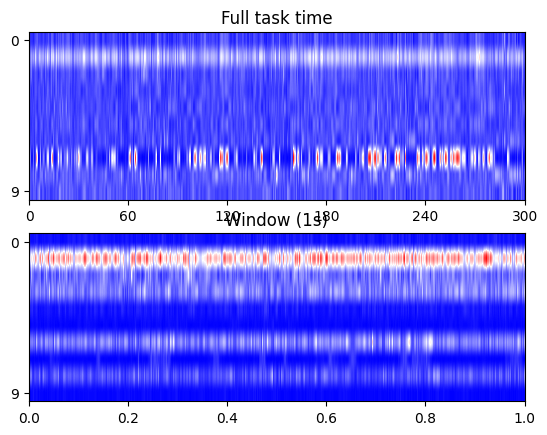

In [60]:
fig

In [ ]:
# Convert Data
new_data = {}
time_vec = list(range(0 , 301))

for key , value in data.items():
    
    if value == "no data":
        new_data[key] = "no data"

    else:

        # extract Values
        electrodes = value["electrode"]
        spike_times = value["spike_times"]

        # extract organoid number
        organoid = key.split("/")[2]

        # loop through valid electrodes (inside organoid)
        # group together the same electrodes and convert to histogram

        used_elec = El2ROW[list(range(used_electrodes[organoid]))]
        spike_array = np.empty((0,300) , dtype=int)
        elec_list = []

        for elec in used_elec:
            if elec in electrodes:

                # find spikes for single electrode
                elec_spikes = np.concatenate(spike_times[electrodes == elec])
            
                # convert into histogram format
                elec_spike_hist , _ = np.histogram(elec_spikes , bins = time_vec)

                # average firing rate based on number of units per electrode
                elec_spike_hist = elec_spike_hist/len(spike_times[electrodes == elec])
                
                # append to global
                spike_array = np.append(spike_array , [list(elec_spike_hist)] , axis=0)
                elec_list.append(elec)   
            else:
                spike_array = np.append(spike_array , [list(np.zeros(300))] , axis=0)

        # limit data to 95th percentile
        p95 = int(np.percentile(spike_array , 95))
        spike_array[spike_array > p95] = p95

        new_data[key] = spike_array

In [19]:
# O21-24 
# end control 4/9 - 1:25
# start 4-AP 4/9 - 1:45

# if possible use data at night (when no one is there)

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0","cluster_quality_label cluster quality type - e.g. 'good', 'MUA', 'noise', etc.",spike_count how many spikes in this recording for this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,0,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,17,n.a.,2271,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,1,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,n.a.,14434,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,2,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,n.a.,12488,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,3,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,18,n.a.,4674,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,4,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,2,n.a.,14792,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,5,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,14,n.a.,4410,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,6,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,25,n.a.,11202,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,7,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,3,n.a.,19064,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,8,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,31,n.a.,7937,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0,9,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,16,n.a.,1348,=BLOB=,=BLOB=,=BLOB=
